In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("../ift6758/data/preprocessed_data/preprocessed_game_data.csv")
df['is_goal'] = df['type'] == 'goal'

# Figure 3.1: most dangerous kind of shots ? most common type of shots ?

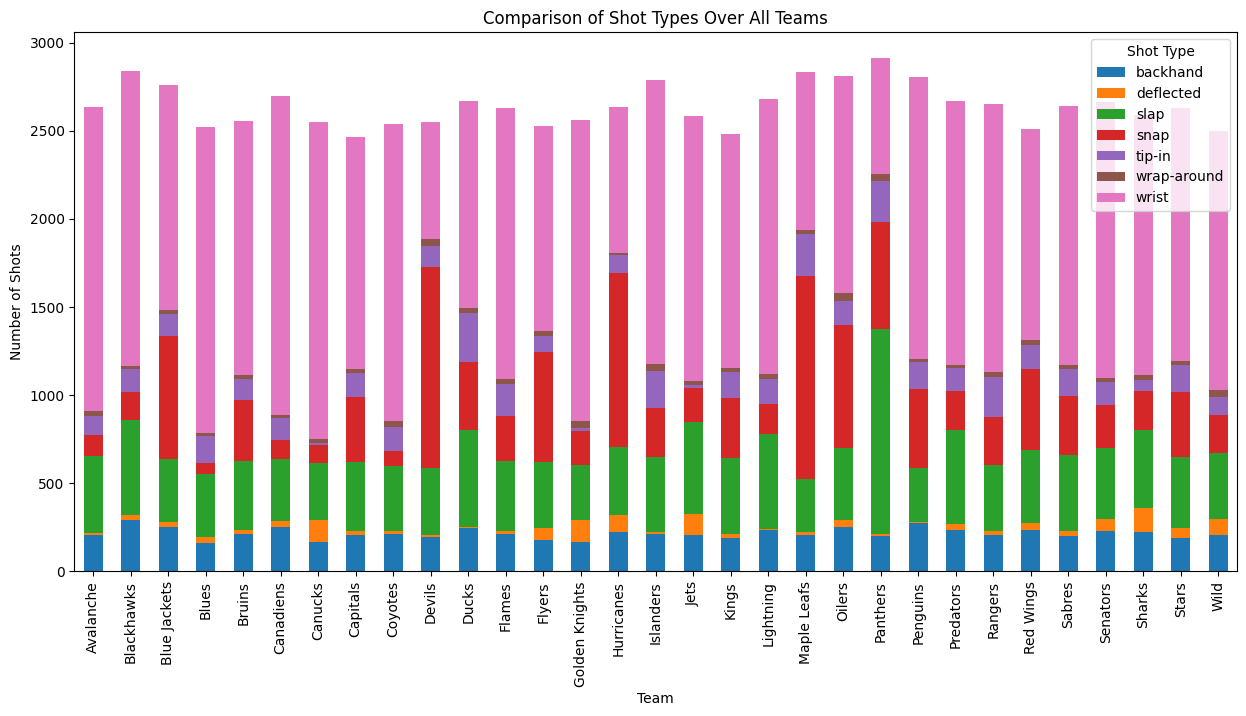

In [3]:

# Group by home_team and shot_type, then count the occurrences
shot_type_counts = df.groupby(['home_team', 'shot_type']).size().unstack().fillna(0)

# Plot the data
shot_type_counts.plot(kind='bar', stacked=True, figsize=(15, 7))
plt.title('Comparison of Shot Types Over All Teams')
plt.xlabel('Team')
plt.ylabel('Number of Shots')
plt.legend(title='Shot Type')
plt.show()

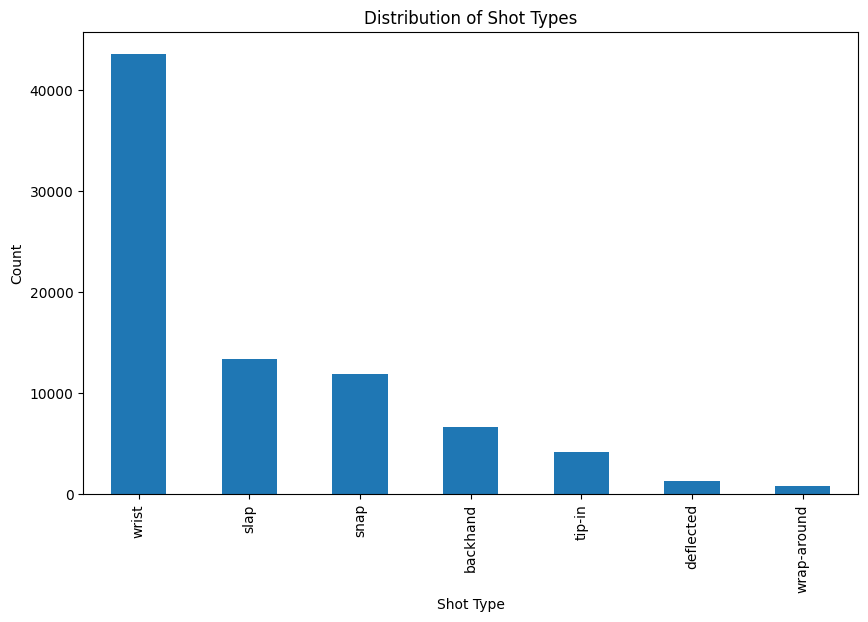

In [4]:
# Count the occurrences of each shot type
shot_type_distribution = df['shot_type'].value_counts()

# Plot the distribution
shot_type_distribution.plot(kind='bar', figsize=(10, 6))
plt.title('Distribution of Shot Types')
plt.xlabel('Shot Type')
plt.ylabel('Count')
plt.show()

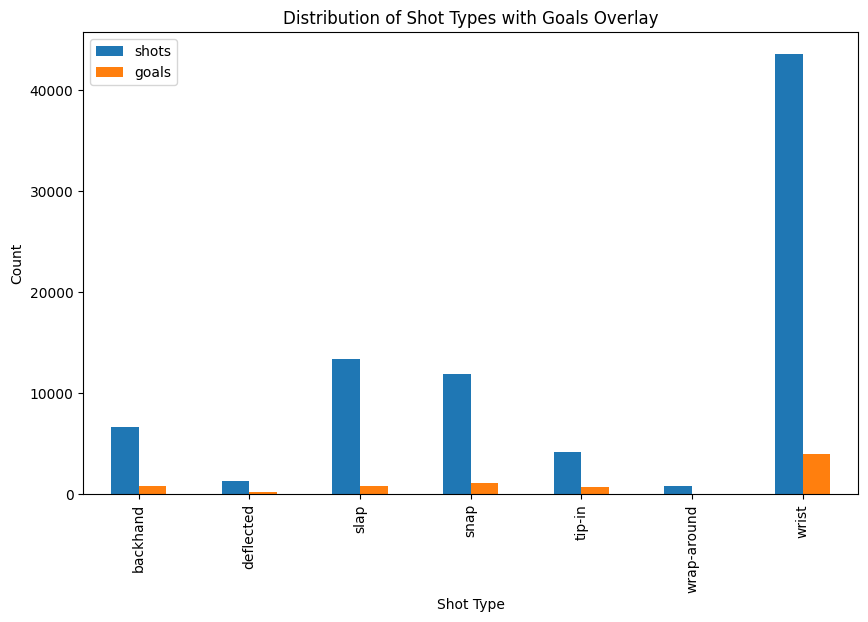

In [5]:
# Calculate the number of goals for each shot type
goal_counts = df[df['type'] == 'goal']['shot_type'].value_counts()

# Overlay the number of goals over the number of shots
shot_type_distribution = pd.DataFrame({
    'shots': df['shot_type'].value_counts(),
    'goals': goal_counts
}).fillna(0)

# Plot the distribution
shot_type_distribution.plot(kind='bar', figsize=(10, 6))
plt.title('Distribution of Shot Types with Goals Overlay')
plt.xlabel('Shot Type')
plt.ylabel('Count')
plt.show()



## most dangerous kinds of shots 
- deflection: makes sense because hard for goalie to catch an imprevisible shot like this one
- wrist shot not that dangerous, even if it's the most common type of shot because it's easier for the goalie to catch

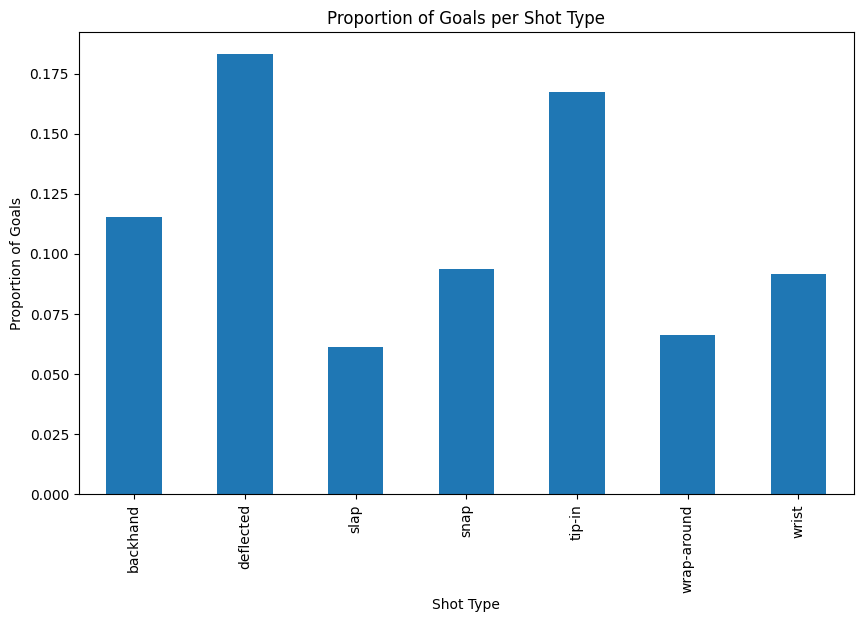

In [6]:
# Calculate the number of goals for each shot type
goal_counts = df[df['type'] == 'goal']['shot_type'].value_counts()

# Calculate the total number of shots for each shot type
total_shots = df['shot_type'].value_counts()

# Calculate the proportion of goals per shot type
proportion_goals = (goal_counts / total_shots).fillna(0)

# Plot the proportion of goals per shot type
proportion_goals.plot(kind='bar', figsize=(10, 6))
plt.title('Proportion of Goals per Shot Type')
plt.xlabel('Shot Type')
plt.ylabel('Proportion of Goals')
plt.show()

In [7]:
filtered_df = df[(df['shot_type'] == 'deflected') & (df['type'] == 'goal')]
filtered_df

,game id,season,date,venue_location,home_team,away_team,event_id,period,timeInPeriod,type,...,shooting_player_id,shooting_player_name,goalie_id,goalie_name,x_coord,y_coord,owner_team,shot_type,zone_code,is_goal
526,2017020008,20172018,2017-10-05,Ottawa,Senators,Capitals,655,3,06:55,goal,...,8475913,Mark Stone,8474651.0,Braden Holtby,67.0,3.0,9,deflected,O,True
629,2017020010,20172018,2017-10-05,Chicago,Blackhawks,Penguins,23,1,07:06,goal,...,8476438,Brandon Saad,8474550.0,Antti Niemi,-82.0,-3.0,16,deflected,O,True
738,2017020011,20172018,2017-10-05,Anaheim,Ducks,Coyotes,442,2,13:50,goal,...,8478432,Christian Fischer,8476434.0,John Gibson,81.0,1.0,53,deflected,O,True
839,2017020013,20172018,2017-10-06,Columbus,Blue Jackets,Islanders,86,1,11:02,goal,...,8474715,Cameron Atkinson,8471306.0,Thomas Greiss,85.0,-5.0,29,deflected,O,True
1170,2017020017,20172018,2017-10-07,Ottawa,Senators,Red Wings,765,3,18:09,goal,...,8470602,Dion Phaneuf,8470657.0,Jimmy Howard,75.0,-2.0,9,deflected,O,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
81185,2017021261,20172018,2018-04-07,Sunrise,Panthers,Sabres,93,1,10:59,goal,...,8474098,Colton Sceviour,8473434.0,Chad Johnson,-77.0,2.0,13,deflected,O,True
81293,2017021263,20172018,2018-04-07,Raleigh,Hurricanes,Lightning,6,1,00:19,goal,...,8473533,Jordan Staal,8475839.0,Louis Domingue,-84.0,-19.0,12,deflected,O,True
81700,2017021269,20172018,2018-04-07,Edmonton,Oilers,Canucks,210,1,17:47,goal,...,8469638,Jussi Jokinen,8475660.0,Cam Talbot,-83.0,-1.0,23,deflected,O,True
81833,2017021271,20172018,2018-04-07,San Jose,Sharks,Wild,202,1,15:28,goal,...,8470613,Brent Burns,8471227.0,Devan Dubnyk,-79.0,6.0,28,deflected,O,True


# Figure 3.2
-  seems like the shots

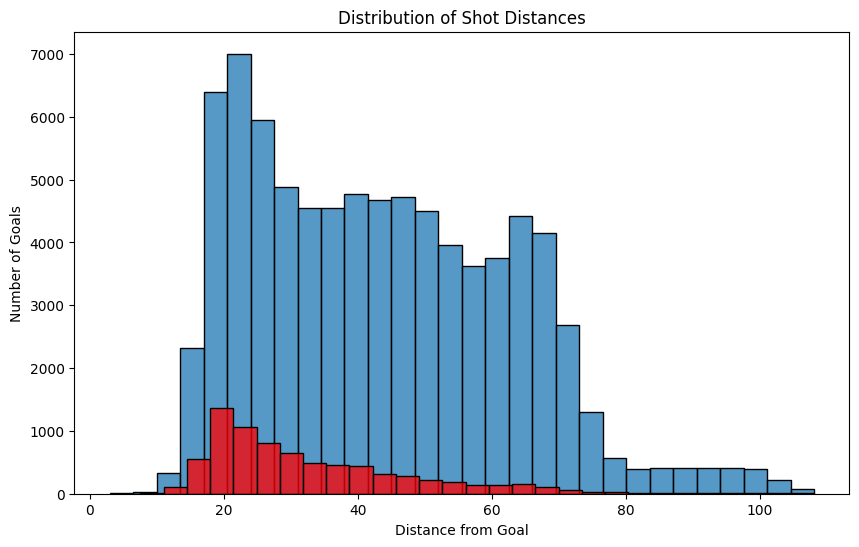

In [8]:
# Calculate the distance from the goal (assuming the goal is at (-100, 0) or (100, 0))
df['distance'] = df.apply(lambda row: min(((row['x_coord'] + 100)**2 + row['y_coord']**2)**0.5, ((row['x_coord'] - 100)**2 + row['y_coord']**2)**0.5), axis=1)
# Plot the distribution of distances
plt.figure(figsize=(10, 6))
bins = 30
sns.histplot(df['distance'], bins=bins, kde=False)
plt.title('Distribution of Shot Distances')
plt.xlabel('Distance from Goal')
plt.ylabel('Frequency')

# Add a secondary y-axis to show the number of goals per bin
ax2 = plt.gca() 
sns.histplot(df[df['is_goal']]['distance'], bins=bins, kde=False, color='r', ax=ax2)
ax2.set_ylabel('Number of Goals')
plt.show()


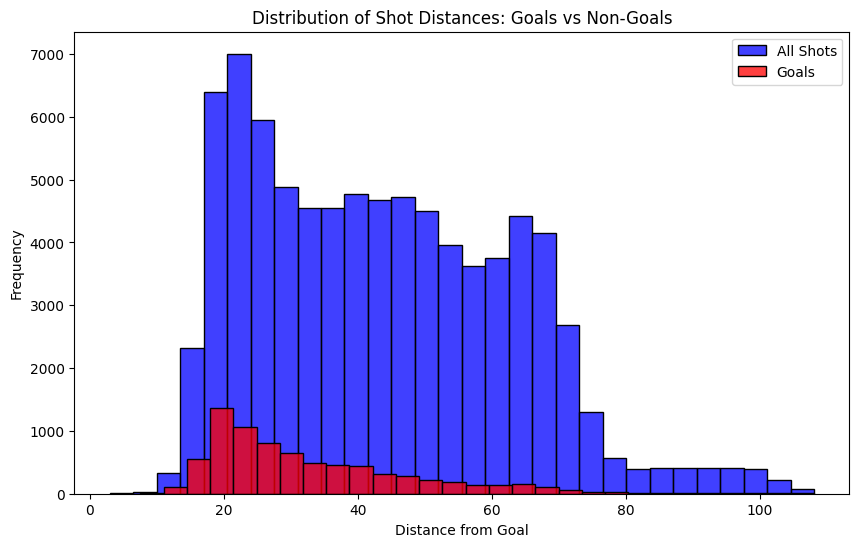

In [9]:
plt.figure(figsize=(10, 6))
bins = 30

# Plot the distribution of distances for all shots
sns.histplot(df['distance'], bins=bins, kde=False, color='blue', label='All Shots')

# Plot the distribution of distances for goals
sns.histplot(df[df['is_goal']]['distance'], bins=bins, kde=False, color='red', label='Goals')

plt.title('Distribution of Shot Distances: Goals vs Non-Goals')
plt.xlabel('Distance from Goal')
plt.ylabel('Frequency')
plt.legend()
plt.show()

C:\Users\dre\AppData\Local\Temp\ipykernel_2500\3322222629.py:8: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  goal_vs_non_goal_counts = df.groupby(['distance_bin', 'is_goal']).size().unstack().fillna(0)


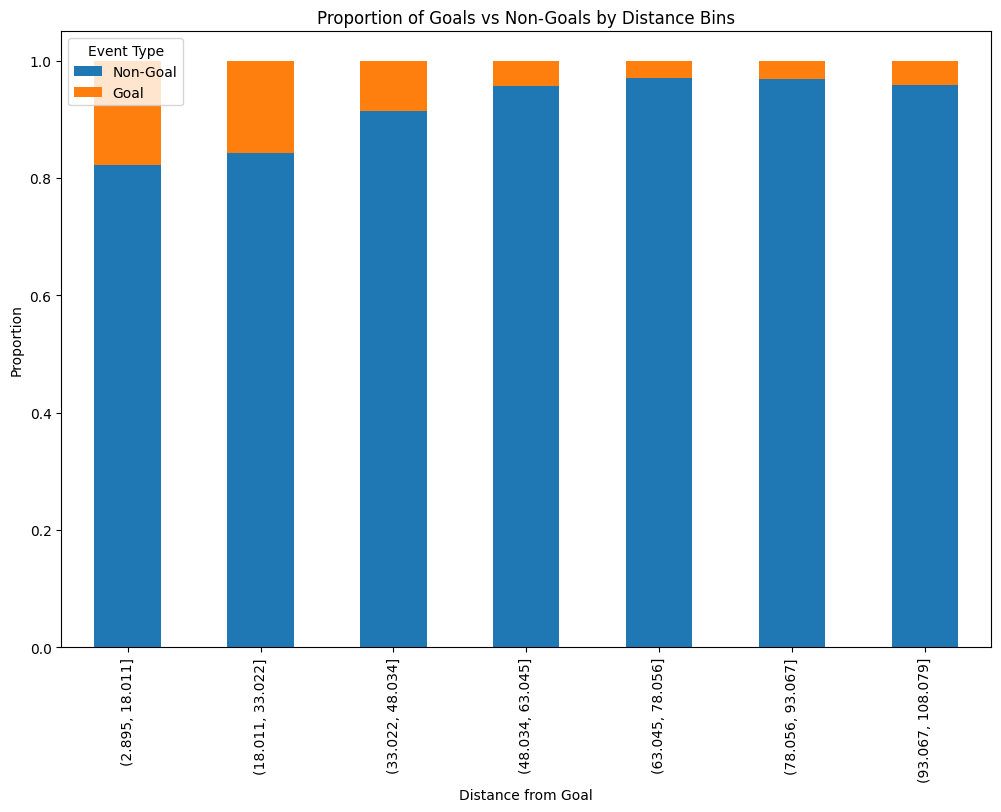

In [31]:
# Calculate the proportion of goals vs non-goals based on distance
goal_vs_non_goal_proportion = goal_vs_non_goal_counts.div(goal_vs_non_goal_counts.sum(axis=1), axis=0)

# Create bins for distance
df['distance_bin'] = pd.cut(df['distance'], bins=7)

# Group by distance_bin and is_goal, then count the occurrences
goal_vs_non_goal_counts = df.groupby(['distance_bin', 'is_goal']).size().unstack().fillna(0)

# Calculate the proportion of goals vs non-goals based on distance
goal_vs_non_goal_proportion = goal_vs_non_goal_counts.div(goal_vs_non_goal_counts.sum(axis=1), axis=0)

# Plot the proportion of goals vs non-goals
goal_vs_non_goal_proportion.plot(kind='bar', stacked=True, figsize=(12, 8))
plt.title('Proportion of Goals vs Non-Goals by Distance Bins')
plt.xlabel('Distance from Goal')
plt.ylabel('Proportion')
plt.legend(title='Event Type', labels=['Non-Goal', 'Goal'])
plt.show()

In [10]:
import numpy as np

data = np.random.randn(1000)  # Example data
num_bins = int(np.sqrt(len(data)))

In [11]:
import numpy as np

data = np.random.randn(1000)  # Example data
num_bins = int(np.ceil(np.log2(len(data)) + 1))

In [12]:
import numpy as np

data = np.random.randn(1000)  # Example data
num_bins = int(2 * (len(data) ** (1/3)))

C:\Users\dre\AppData\Local\Temp\ipykernel_2500\3153811590.py:8: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  goal_vs_non_goal_counts = df.groupby(['distance_bin', 'is_goal']).size().unstack().fillna(0)


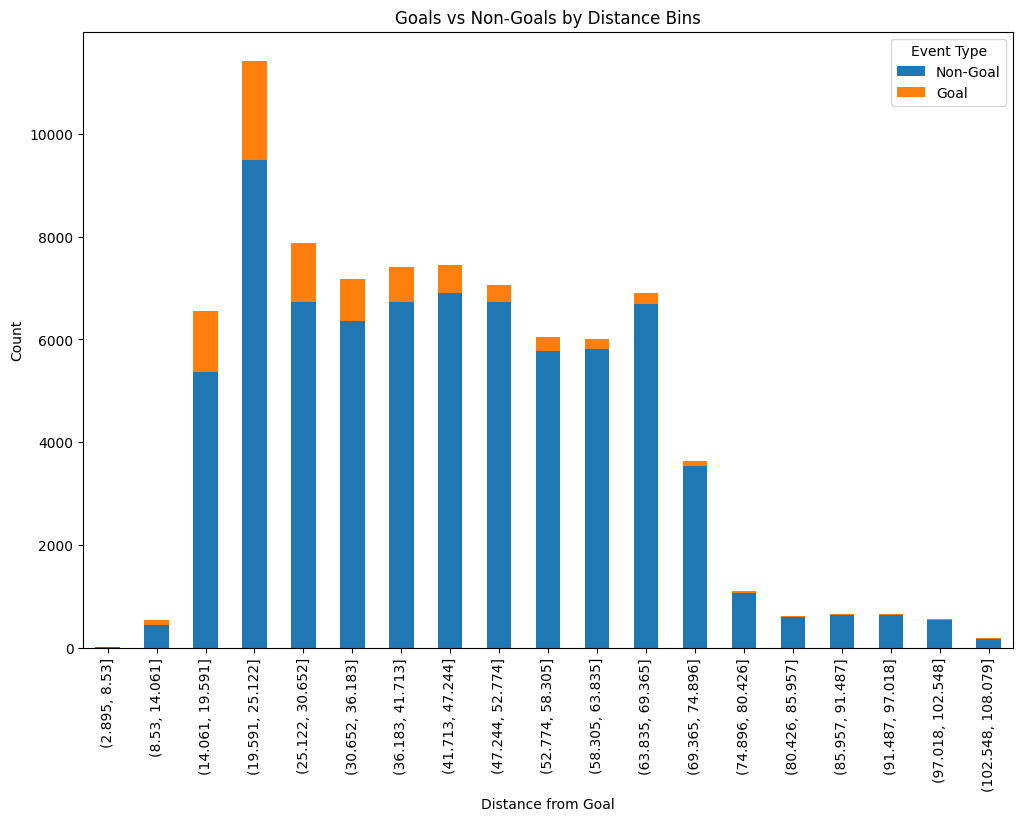

In [13]:


# Create a new column to indicate if the event was a goal
df['is_goal'] = df['type'] == 'goal'

# Create bins for distance
df['distance_bin'] = pd.cut(df['distance'], bins=num_bins)

# Group by distance_bin and is_goal, then count the occurrences
goal_vs_non_goal_counts = df.groupby(['distance_bin', 'is_goal']).size().unstack().fillna(0)

# Plot the data
goal_vs_non_goal_counts.plot(kind='bar', stacked=True, figsize=(12, 8))
plt.title('Goals vs Non-Goals by Distance Bins')
plt.xlabel('Distance from Goal')
plt.ylabel('Count')
plt.legend(title='Event Type', labels=['Non-Goal', 'Goal'])
plt.show()

In [14]:
print(df['distance_bin'].cat.categories)

IntervalIndex([     (2.895, 8.53],     (8.53, 14.061],   (14.061, 19.591],
                 (19.591, 25.122],   (25.122, 30.652],   (30.652, 36.183],
                 (36.183, 41.713],   (41.713, 47.244],   (47.244, 52.774],
                 (52.774, 58.305],   (58.305, 63.835],   (63.835, 69.365],
                 (69.365, 74.896],   (74.896, 80.426],   (80.426, 85.957],
                 (85.957, 91.487],   (91.487, 97.018],  (97.018, 102.548],
               (102.548, 108.079]],
              dtype='interval[float64, right]')


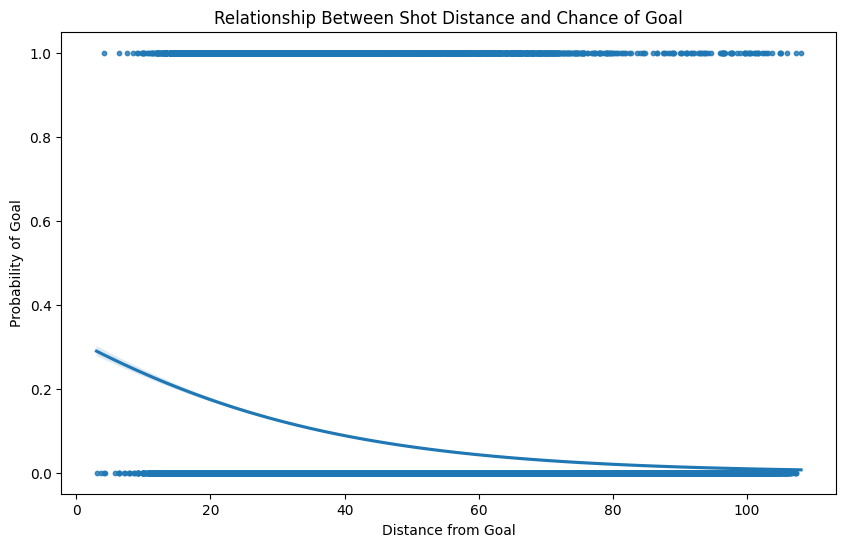

In [15]:
# Plot the data
plt.figure(figsize=(10, 6))
sns.regplot(x='distance', y='is_goal', data=df, logistic=True, scatter_kws={'s': 10})
plt.title('Relationship Between Shot Distance and Chance of Goal')
plt.xlabel('Distance from Goal')
plt.ylabel('Probability of Goal')
plt.show()

# figure 3.3

C:\Users\dre\AppData\Local\Temp\ipykernel_2500\2597462338.py:8: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  goal_percentage = df.groupby(['distance_bin', 'shot_type'])['is_goal'].mean().reset_index()


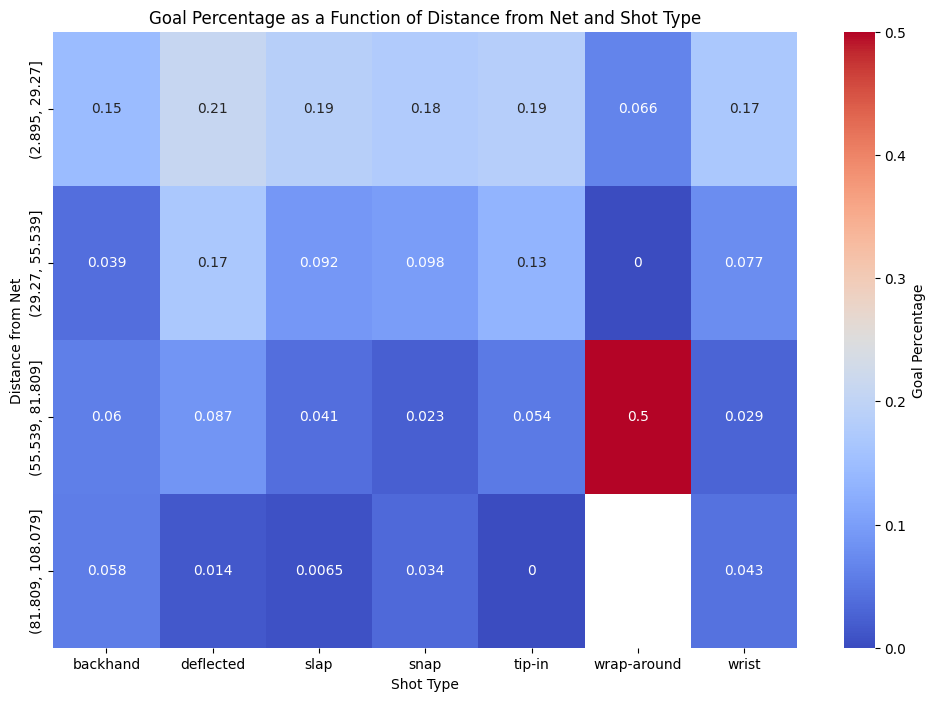

In [16]:
# Create a new column to indicate if the event was a goal
df['is_goal'] = df['type'] == 'goal'

# Create bins for distance
df['distance_bin'] = pd.cut(df['distance'], bins=4)

# Calculate goal percentage for each combination of distance bin and shot type
goal_percentage = df.groupby(['distance_bin', 'shot_type'])['is_goal'].mean().reset_index()

# Pivot the data for easier plotting
goal_percentage_pivot = goal_percentage.pivot(index='distance_bin', columns='shot_type', values='is_goal')

# Plot the data
plt.figure(figsize=(12, 8))
sns.heatmap(goal_percentage_pivot, annot=True, cmap='coolwarm', cbar_kws={'label': 'Goal Percentage'})
plt.title('Goal Percentage as a Function of Distance from Net and Shot Type')
plt.xlabel('Shot Type')
plt.ylabel('Distance from Net')
plt.show()

C:\Users\dre\AppData\Local\Temp\ipykernel_2500\1167167206.py:8: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  goal_percentage = df.groupby(['distance_bin', 'shot_type'])['is_goal'].mean().reset_index()


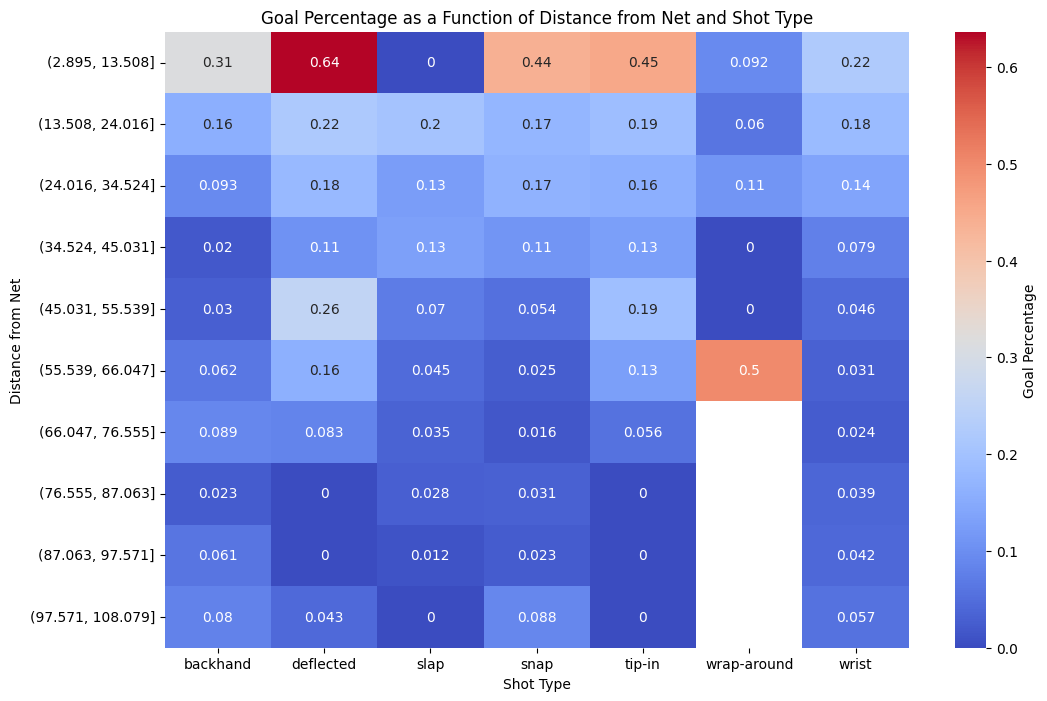

In [17]:
# Create a new column to indicate if the event was a goal
df['is_goal'] = df['type'] == 'goal'

# Create bins for distance
df['distance_bin'] = pd.cut(df['distance'], bins=10)

# Calculate goal percentage for each combination of distance bin and shot type
goal_percentage = df.groupby(['distance_bin', 'shot_type'])['is_goal'].mean().reset_index()

# Pivot the data for easier plotting
goal_percentage_pivot = goal_percentage.pivot(index='distance_bin', columns='shot_type', values='is_goal')

# Plot the data
plt.figure(figsize=(12, 8))
sns.heatmap(goal_percentage_pivot, annot=True, cmap='coolwarm', cbar_kws={'label': 'Goal Percentage'})
plt.title('Goal Percentage as a Function of Distance from Net and Shot Type')
plt.xlabel('Shot Type')
plt.ylabel('Distance from Net')
plt.show()